In [1]:
import matplotlib.pyplot as plt
import litstudy

In [2]:
docs_ieee = litstudy.load_ieee_csv("ieeexplore.csv")
docs_springer = litstudy.load_springer_csv("springer.csv")

In [3]:
print(f"Documents in IEEE Xplore: {len(docs_ieee)}")
print(f"Documents in Springer Link: {len(docs_springer)}")

Documents in IEEE Xplore: 99
Documents in Springer Link: 122


In [4]:
docs = docs_ieee | docs_springer
docs_crossref, docs_notfound = litstudy.refine_crossref(docs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221/221 [00:00<00:00, 6134.13it/s]


In [5]:
print(f"Documents refined: {len(docs_crossref)}")
print(f"Documents not found: {len(docs_notfound)}")

Documents refined: 221
Documents not found: 0


In [6]:
corpus = litstudy.build_corpus(docs_crossref, ngram_threshold=0.8)

In [7]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
deep_learning,30
neural_networks,10
semantic_segmentation,10


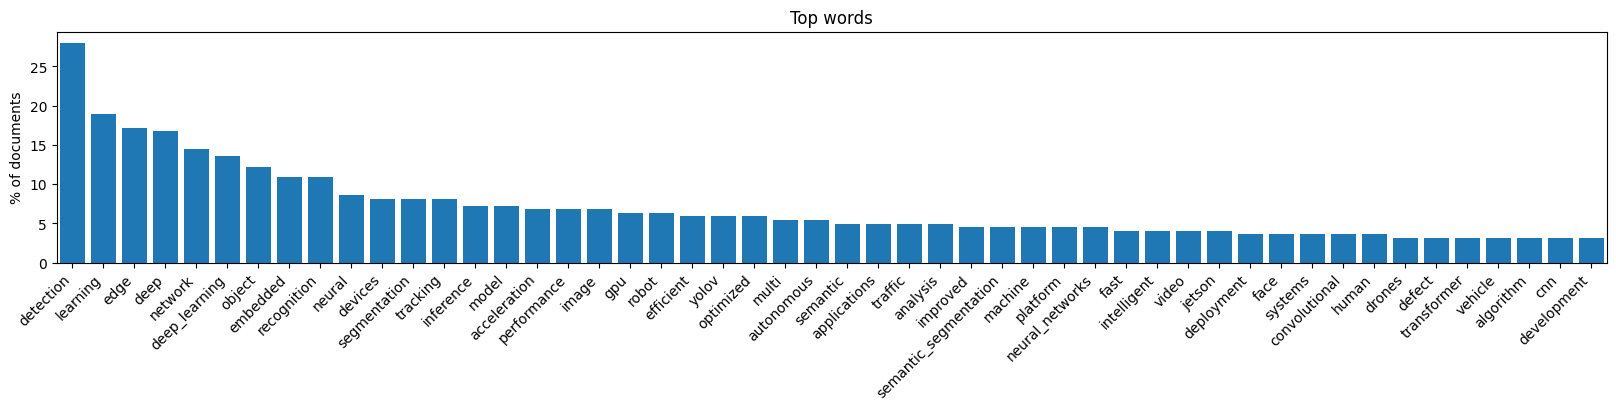

In [8]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);

In [9]:
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

In [10]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['segmentation', 'semantic', 'semantic_segmentation', 'fast', 'machine']
Topic 2: ['traffic', 'recognition', 'vehicle', 'autonomous', 'systems']
Topic 3: ['algorithm', 'recognition', 'development', 'deployment', 'aware']
Topic 4: ['detection', 'object', 'benchmark', 'systems', 'tracking']
Topic 5: ['yolov', 'improved', 'detection', 'research', 'efficient']
Topic 6: ['multi', 'video', 'tracking', 'object', 'cnn']
Topic 7: ['neural', 'network', 'neural_networks', 'convolutional', 'quantization']
Topic 8: ['model', 'face', 'transformer', 'performance', 'segmentation']
Topic 9: ['human', 'robot', 'end', 'recognition', 'mobile']
Topic 10: ['gpu', 'embedded', 'optimized', 'cnn', 'inference']
Topic 11: ['acceleration', 'nvidia', 'jetson', 'vehicle', 'aware']
Topic 12: ['learning', 'deep_learning', 'deep', 'machine', 'defect']
Topic 13: ['image', 'drones', 'enhanced', 'classification', 'identification']
Topic 14: ['edge', 'devices', 'autonomous', 'tracking', 'visualization']
Topic 15:

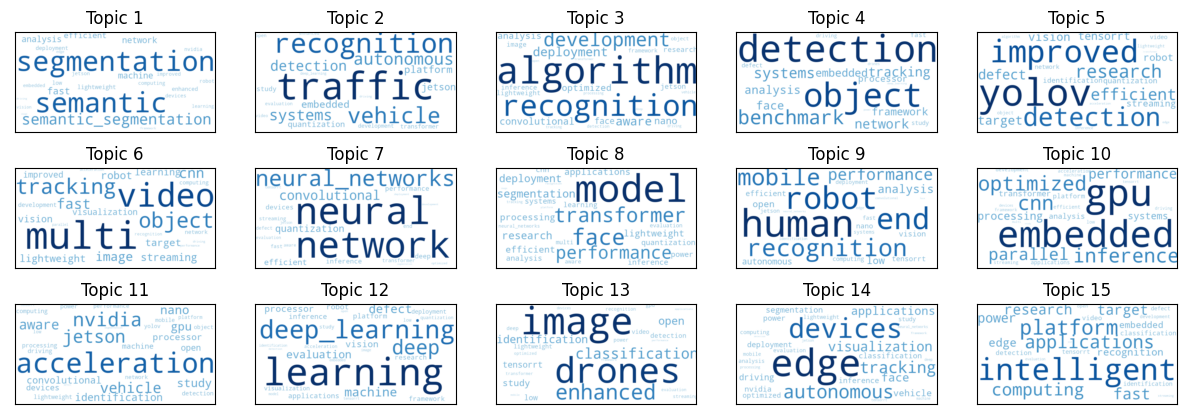

In [11]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

In [12]:
topic_nn = topic_model.best_topic_for_token('neural_networks')
topic_gpu = topic_model.best_topic_for_token('gpu')
topic_acc = topic_model.best_topic_for_token('acceleration')
topic_lea = topic_model.best_topic_for_token('learning')

In [13]:
for doc_id in topic_model.best_documents_for_topic(topic_nn):
    print(f"{docs[int(doc_id)].title} ({print(docs[int(doc_id)].id)})")
for doc_id in topic_model.best_documents_for_topic(topic_gpu):
    print(f"{docs[int(doc_id)].title} ({print(docs[int(doc_id)].id)})")
for doc_id in topic_model.best_documents_for_topic(topic_acc):
    print(f"{docs[int(doc_id)].title} ({print(docs[int(doc_id)].id)})")
for doc_id in topic_model.best_documents_for_topic(topic_lea):
    print(f"{docs[int(doc_id)].title} ({print(docs[int(doc_id)].id)})")

<AdaNeRF: Adaptive Sampling for Real-Time Rendering of Neural Radiance Fields, {'doi': '10.1007/978-3-031-19790-1_16'}>
AdaNeRF: Adaptive Sampling for Real-Time Rendering of Neural Radiance Fields (None)
<On Practical Approach to Uniform Quantization of Non-redundant Neural Networks, {'doi': '10.1007/978-3-030-30484-3_29'}>
On Practical Approach to Uniform Quantization of Non-redundant Neural Networks (None)
<Trainable Thresholds for Neural Network Quantization, {'doi': '10.1007/978-3-030-20518-8_26'}>
Trainable Thresholds for Neural Network Quantization (None)
<How Can Deep Neural Networks Be Generated Efficiently for Devices with Limited Resources?, {'doi': '10.1007/978-3-319-94544-6_3'}>
How Can Deep Neural Networks Be Generated Efficiently for Devices with Limited Resources? (None)
<Efficient Integer-Arithmetic-Only Convolutional Networks with Bounded ReLU, {'doi': '10.1109/ISCAS51556.2021.9401448'}>
Efficient Integer-Arithmetic-Only Convolutional Networks with Bounded ReLU (None)
